### Python & Data Cleaning

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Display the first few rows
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [2]:
# Check datatypes
print("\nData Types:\n", df.dtypes)

# Check for null values
print("\nNull Values:\n", df.isnull().sum())


Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Null Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [3]:
# Check for Duplicates or Invalid Data

# Check duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Optional: Remove duplicates if any
df = df.drop_duplicates()


Duplicate Rows: 0


In [4]:
# Standardize Categorical Values

# Rename column names for clarity
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Example: group education levels
df['parental_level_of_education'] = df['parental_level_of_education'].replace({
    "some high school": "high school",
    "high school": "high school",
    "some college": "college",
    "associate's degree": "college",
    "bachelor's degree": "university",
    "master's degree": "university"
})

# Standardize ethnicities
df['race/ethnicity'] = df['race/ethnicity'].replace({
    'group A': 'Ethnic Group A',
    'group B': 'Ethnic Group B',
    'group C': 'Ethnic Group C',
    'group D': 'Ethnic Group D',
    'group E': 'Ethnic Group E'
})


### Add Derived Columns

In [8]:
# Add average score column
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Performance Category
def categorize_performance(score):
    if score >= 80:
        return "High"
    elif score >= 60:
        return "Medium"
    else:
        return "Low"

df['performance_category'] = df['average_score'].apply(categorize_performance)

# Preparation effectiveness
prep_avg = df.groupby('test_preparation_course')['average_score'].mean().reset_index()
print("\nAverage Scores by Preparation Status:\n", prep_avg)


Average Scores by Preparation Status:
   test_preparation_course  average_score
0               completed      72.669460
1                    none      65.038941


### Exploratory Data Analysis: 
 Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to understand its main characteristics, detect patterns, spot anomalies, and test assumptions before applying machine learning or statistical models.

Key Steps in EDA:

1). Understand Data StructureView columns, data types, and summary statistics.

2). Check for missing or duplicate values.

3). Visualize Data: Use charts (histograms, boxplots, scatterplots) to explore distributions and relationships.

4). Identify Patterns and Trends: Discover correlations, group behavior, and outliers.

5). Clean and Prepare Data: Handle missing values, standardize formats, and create new useful features.

In [9]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for seaborn
sns.set(style="whitegrid")

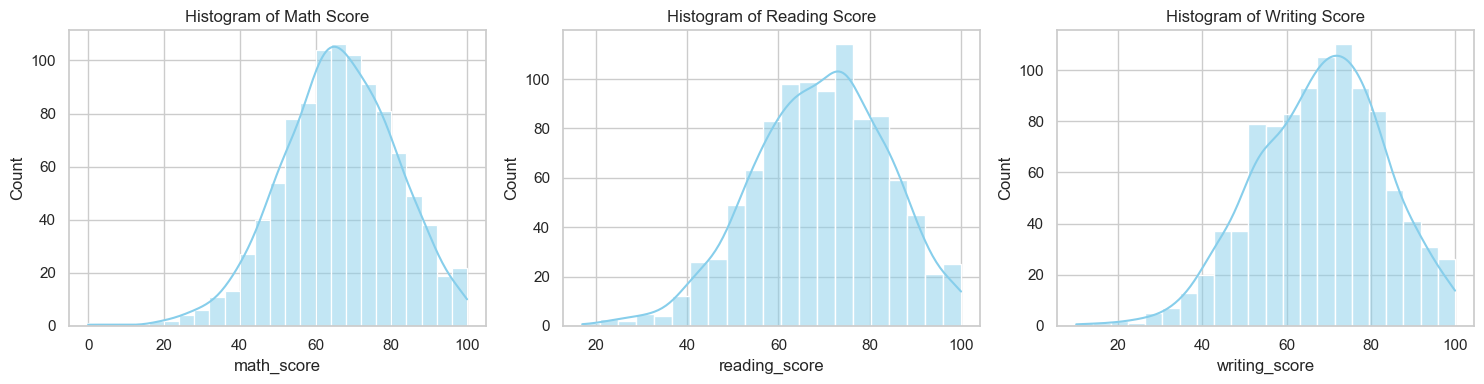

In [10]:
# Histograms for All Three Subject Scores

plt.figure(figsize=(15, 4))
for i, subject in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[subject], kde=True, color='skyblue')
    plt.title(f'Histogram of {subject.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

### 1).Math Score Histogram:
The scores are skewed slightly to the left (more students have higher scores).

Most students scored between 60 and 80.

Very few students scored below 40 or above 90.

### 2). Reading Score Histogram:
The distribution is fairly symmetrical, resembling a normal distribution.

Majority of scores fall between 60 and 80.

Few students scored below 40 or above 90.

### 3). Writing Score Histogram:
Similar to reading, this is also nearly symmetrical.

Most scores are concentrated between 60 and 80.

A small number of students scored very low or very high.

C:\Users\MR Bhagwanji mishra\AppData\Local\Temp\ipykernel_9264\1906107398.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')
C:\Users\MR Bhagwanji mishra\AppData\Local\Temp\ipykernel_9264\1906107398.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_level_of_education', y='average_score', data=df, palette='Set3')


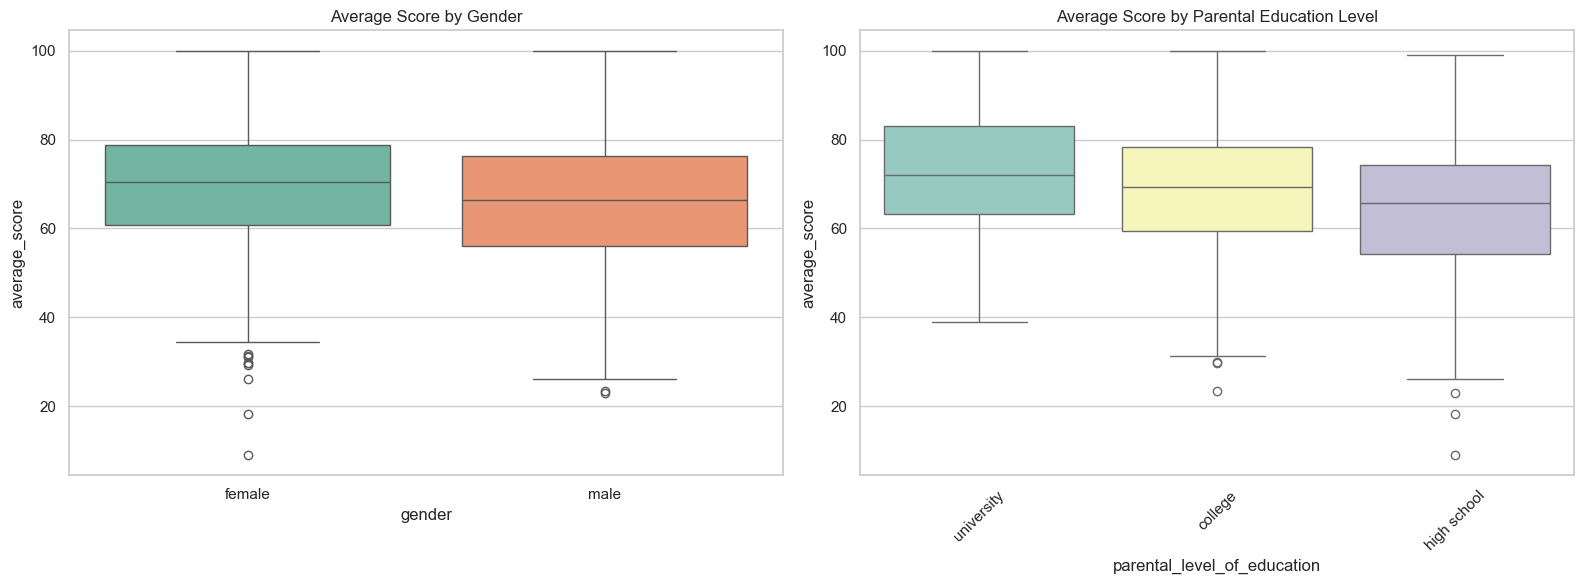

In [11]:
# Box Plots – Scores by Gender and Parental Education Level

plt.figure(figsize=(16, 6))

# By Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')
plt.title('Average Score by Gender')

# By Parental Education
plt.subplot(1, 2, 2)
sns.boxplot(x='parental_level_of_education', y='average_score', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Average Score by Parental Education Level')

plt.tight_layout()
plt.show()

### 📊 Box Plot 1: Average Score by Gender
Median Score (middle line in each box):

Female students have a slightly higher median average score than male students.

Interquartile Range (IQR) (the box):

Both genders have a similar score spread (range between 25th and 75th percentile).

Outliers (dots below the box):

There are more low outliers in female students, meaning a few scored quite low.

Conclusion:

Overall, females tend to perform slightly better on average, but score variability is similar for both genders.

### 📊 Box Plot 2: Average Score by Parental Education Level
Groups Compared: university, college, high school (note: labels may be standardized earlier)

Trend:

Students whose parents have a university education tend to have higher median average scores.

Students from high school-educated parents show lower median scores.

Score Distribution:

All groups have similar ranges, but the median shifts higher with increased parental education.

### Conclusion:

There’s a positive correlation between parental education level and student performance.

### Summary:
Female students slightly outperform male students.

Higher parental education is associated with better student scores.

C:\Users\MR Bhagwanji mishra\AppData\Local\Temp\ipykernel_9264\730554206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test_preparation_course', y='average_score', data=df, palette='pastel')
C:\Users\MR Bhagwanji mishra\AppData\Local\Temp\ipykernel_9264\730554206.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='average_score', data=df, palette='muted')


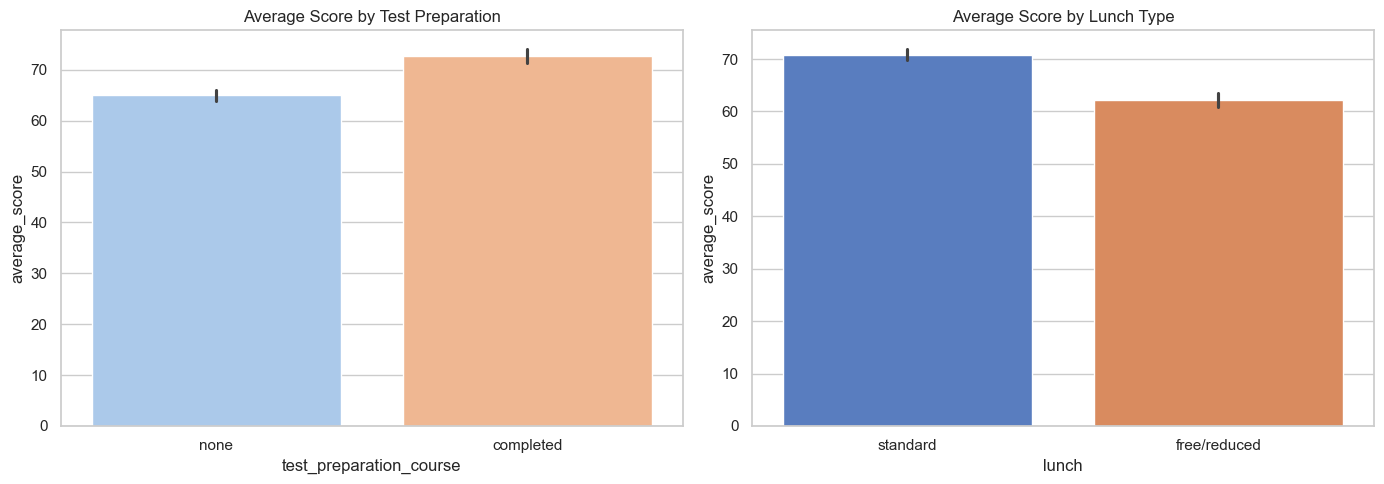

In [13]:
# Grouped Bar Plot – Average Scores by Test Preparation & Lunch Type

plt.figure(figsize=(14, 5))

# Test Preparation
plt.subplot(1, 2, 1)
sns.barplot(x='test_preparation_course', y='average_score', data=df, palette='pastel')
plt.title('Average Score by Test Preparation')

# Lunch Type
plt.subplot(1, 2, 2)
sns.barplot(x='lunch', y='average_score', data=df, palette='muted')
plt.title('Average Score by Lunch Type')

plt.tight_layout()
plt.show()


### 📊 Bar Plot 1: Average Score by Test Preparation
Students who completed test preparation scored significantly higher on average than those who did not.

Completed Prep: ~70 average score

No Prep: ~62 average score

Conclusion:
Completing a test preparation course clearly improves student performance.

### 📊 Bar Plot 2: Average Score by Lunch Type
Students with standard lunch have higher average scores compared to students with free/reduced lunch.

Standard Lunch: ~70 average score

Free/Reduced Lunch: ~62 average score

### Conclusion:
Lunch type can be an indicator of socioeconomic status, and students with better access to resources (standard lunch) tend to perform better.

### Overall Insights:
Preparation matters: Students who prepare perform better.

Socioeconomic factors affect performance: Better access (standard lunch) links to higher scores.

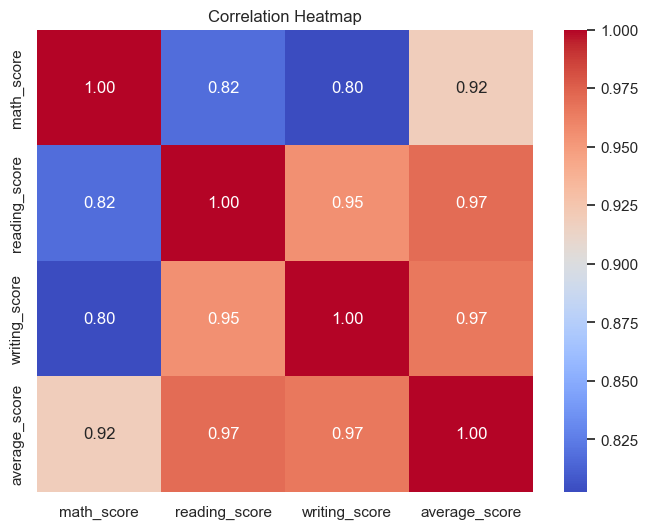

In [14]:
# Heatmap – Correlation Among Numerical Features

plt.figure(figsize=(8, 6))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap shows how strongly the scores in Math, Reading, Writing, and Average Score are related to each other.

### Key Points:
### Pair of Features	Correlation              Coefficient	Interpretation
Math & Reading Score	0.82	                 Strong positive correlation.  
Math & Writing Score	0.80	                 Strong positive correlation.  
Reading & Writing Score	0.95	                 Very strong positive correlation.  
Math & Average Score	0.92	                 Very strong correlation (math is a key factor).  
Reading & Average Score	0.97	                 Very strong correlation.  
Writing & Average Score	0.97	                 Very strong correlation.  

### What Does It Mean?
Reading and Writing scores are most closely related (0.95):
Students who score high in reading also tend to score high in writing.

All individual scores are strongly correlated with Average Score (≥ 0.92):
This is expected because the average is calculated from these three.

All correlations are positive:
When one score increases, the others tend to increase too.

### Conclusion:
Reading and Writing scores are highly interdependent.

Math score is also strongly related but slightly less than the other two.

This correlation can help in predictive modeling, as one subject’s score may help predict others.

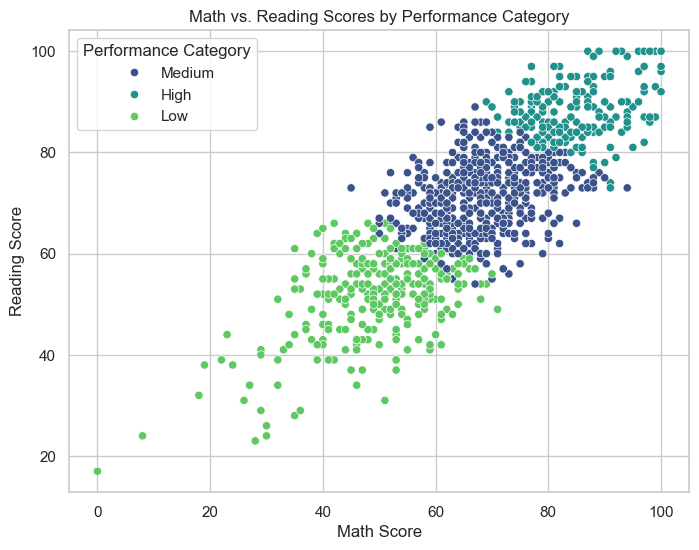

In [15]:
# Scatter Plot – Math vs. Reading Scores (Performance Category Color)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math_score', y='reading_score', hue='performance_category', palette='viridis')
plt.title('Math vs. Reading Scores by Performance Category')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Performance Category')
plt.show()

### What the Plot Shows:
Each dot represents a student’s Math Score (X-axis) and Reading Score (Y-axis).

### Dots are colored by Performance Category:

Low (green)

Medium (blue)

High (teal)

### Key Insights:
1). Positive Correlation:

There’s a clear upward trend: as Math scores increase, Reading scores also increase.

Indicates a strong positive relationship between the two subjects.

2). Performance Category Separation:

Low Performers (green) are clustered in the bottom-left (low scores in both subjects).

Medium Performers (blue) are in the middle zone.

3). High Performers (teal) are in the top-right, scoring high in both subjects.

No Overlap at Extremes:

High performers do not appear in low score ranges, and low performers do not reach high scores.

### Conclusion:
Reading and Math performance go hand-in-hand — better in one often means better in the other.

Performance categories are well-distributed, and the classification appears to be accurate and meaningful.

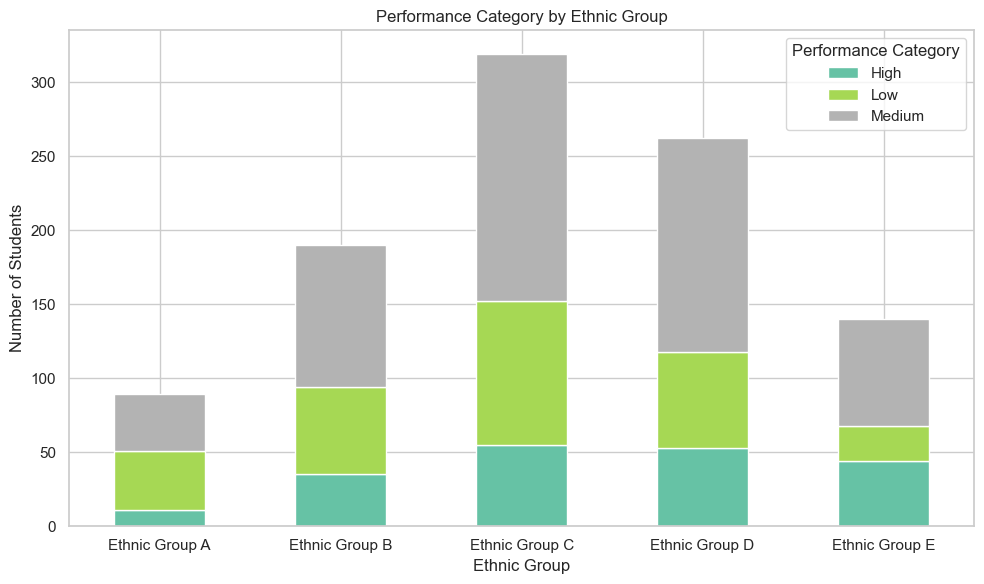

In [16]:
# Stacked Bar Chart – Performance Category by Ethnic Group

performance_ethnicity = df.groupby(['race/ethnicity', 'performance_category']).size().unstack().fillna(0)
performance_ethnicity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Performance Category by Ethnic Group")
plt.ylabel("Number of Students")
plt.xlabel("Ethnic Group")
plt.xticks(rotation=0)
plt.legend(title='Performance Category')
plt.tight_layout()
plt.show()

1).Ethnic Group C has the highest total number of students, and also a large number in medium and low performance. This group contributes significantly to the overall dataset.

2). Ethnic Group D also has a large number of students, with a balanced distribution across all three categories.

3). Ethnic Group A has the smallest population and also a high proportion of low-performing students, with few in the high category.

4). Ethnic Group E has a relatively smaller student count, but a good portion of high performers, indicating stronger academic outcomes in a smaller group.

5).Ethnic Group B falls in the middle in terms of population and performance distribution, skewed slightly toward medium and low.

### 📌 Key Insights:
There's no ethnic group that dominates the "High" category, but Group E and Group D have relatively stronger representation among high performers.

Group C, while the most populous, has a large low and medium performing segment.

This visualization helps educators or policymakers identify which groups might need more academic support and where high-performing groups are concentrated.

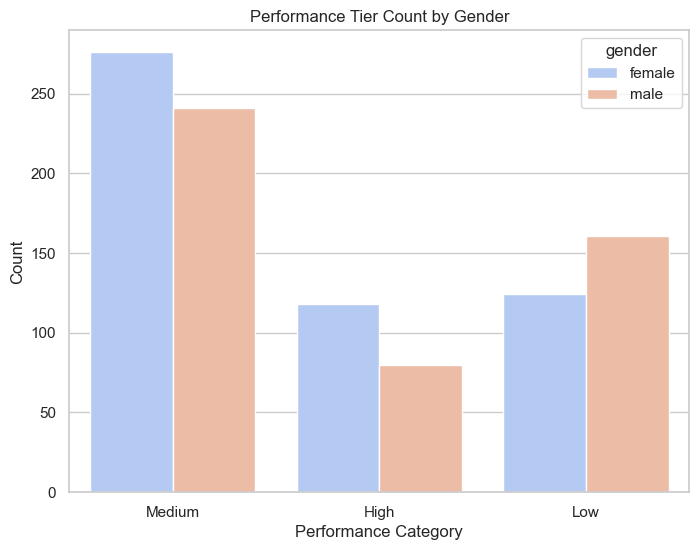

In [17]:
# Count Plot – Students in Each Performance Tier by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='performance_category', hue='gender', data=df, palette='coolwarm')
plt.title("Performance Tier Count by Gender")
plt.xlabel("Performance Category")
plt.ylabel("Count")
plt.show()


### Key Observations:
Performance Category	Female Count	Male Count	Observation.  
Medium	Highest	High	Most students, both male and female, are in the medium category. Females outnumber males slightly.  
High	Moderate	Low	More females achieved high performance compared to males.  
Low	Moderate	High	Males dominate in the low performance category. There are significantly more low-performing males than females.  

### Conclusion:
Females outperform males overall: More females are in the high and medium categories.

Males underperform: A higher number of males fall into the low performance tier.

This trend suggests a gender performance gap, favoring females in this dataset.